<a href="https://colab.research.google.com/github/RKM-MML/ACS_motion/blob/main/mlmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Install Ultralytics if not already
!pip install ultralytics --upgrade -q

# STEP 2: Import and Check Device
from ultralytics import YOLO
import torch

print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.device("cuda" if torch.cuda.is_available() else "cpu"))

CUDA available: True
Device: cuda


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qz3gXKPbOfhvVaI8oDt4")
project = rf.workspace("rkm-nnbdx").project("microfocus")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# STEP 3: Custom training config
model = YOLO("yolov8n-seg.pt")  # Use n/m/l/x depending on your compute

model.train(
    data="/content/Microfocus-1/data.yaml",
    epochs=200,
    imgsz=640,
    patience=20,            # Early stopping after 20 val epochs without improvement
    lr0=1e-3,               # Initial learning rate
    lrf=1e-5,               # Final LR after cosine decay
    warmup_epochs=3,        # Optional warm-up
    weight_decay=0.001,     # Regularization
    batch=16,
    optimizer="AdamW",      # Stable optimizer
    augment=True,           # Enable built-in augmentations
    close_mosaic=10,        # Helps with small objects
    cache=True,             # Speeds up training
    save=True,
    save_period=10,         # Save every 10 epochs
    project="runs/train",
    name="yolov8-seg-foc",
    verbose=True
)


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Microfocus-1/data.yaml, epochs=200, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=10, cache=True, device=None, workers=8, project=runs/train, name=yolov8-seg-foc2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 19.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 80.8MB/s]


AMP: checks passed ✅


train: Scanning /content/Microfocus-1/train/labels... 384 images, 21 backgrounds, 0 corrupt: 100%|██████████| 384/384 [00:00<00:00, 1709.73it/s]

train: New cache created: /content/Microfocus-1/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.4GB RAM): 100%|██████████| 384/384 [00:01<00:00, 344.32it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Microfocus-1/valid/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 745.26it/s]

val: New cache created: /content/Microfocus-1/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 37/37 [00:00<00:00, 102.39it/s]


Plotting labels to runs/train/yolov8-seg-foc2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.001), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/yolov8-seg-foc2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.62G       1.35       4.31      2.594      1.665         43        640: 100%|██████████| 24/24 [00:11<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         37         50    0.00381       0.78      0.214     0.0967    0.00166       0.34     0.0809     0.0192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.24G      1.274      2.926      1.808      1.567         38        640: 100%|██████████| 24/24 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         37         50    0.00674        0.6       0.13     0.0606    0.00157       0.14    0.00147   0.000247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.26G      1.291      2.789      1.627      1.544         42        640: 100%|██████████| 24/24 [00:06<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.06it/s]

                   all         37         50      0.674       0.33      0.389      0.205      0.529       0.08     0.0834     0.0218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.28G      1.285      2.536      1.499      1.502         49        640: 100%|██████████| 24/24 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         37         50      0.328       0.32      0.268      0.146       0.42       0.24      0.226     0.0729



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200       3.3G       1.23      2.457      1.446      1.517         50        640: 100%|██████████| 24/24 [00:08<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         37         50       0.76       0.38       0.43      0.202       0.24        0.2      0.114     0.0359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.31G      1.206       2.37      1.386      1.463         39        640: 100%|██████████| 24/24 [00:06<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         37         50       0.88       0.46      0.523      0.291       0.66        0.4       0.44      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.33G       1.17      2.349      1.358      1.447         49        640: 100%|██████████| 24/24 [00:07<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         37         50      0.545       0.42      0.379      0.182      0.523       0.38      0.347      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.36G      1.164      2.383      1.362      1.439         39        640: 100%|██████████| 24/24 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         37         50       0.59       0.56      0.451      0.193      0.508       0.46      0.395       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.37G      1.163      2.285      1.315      1.435         33        640: 100%|██████████| 24/24 [00:07<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all         37         50      0.714       0.58      0.596      0.374      0.596       0.48      0.445      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.39G        1.1       2.16      1.249      1.412         37        640: 100%|██████████| 24/24 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         37         50        0.6       0.38      0.446      0.205      0.677       0.24      0.301     0.0992



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.41G      1.105      2.211      1.245        1.4         40        640: 100%|██████████| 24/24 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         37         50      0.384       0.36      0.314      0.166      0.347       0.34      0.256      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.43G       1.07      2.173      1.177       1.37         41        640: 100%|██████████| 24/24 [00:06<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         37         50      0.568       0.44      0.337      0.121       0.37       0.28      0.198     0.0466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.45G      1.157      2.163      1.184      1.411         40        640: 100%|██████████| 24/24 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         37         50      0.585       0.44      0.423      0.172      0.493       0.36       0.26       0.07



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.46G      1.105      2.119      1.175      1.395         48        640: 100%|██████████| 24/24 [00:07<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         37         50      0.618       0.62       0.55      0.219      0.475       0.44      0.295     0.0889



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.48G      1.101      2.138      1.177      1.401         40        640: 100%|██████████| 24/24 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         37         50      0.743        0.6      0.552      0.251      0.509       0.56      0.379      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200       3.5G      1.085      2.151      1.131       1.35         39        640: 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         37         50      0.837      0.617      0.659      0.415      0.729      0.539      0.483      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.52G      1.057      2.103      1.127      1.364         46        640: 100%|██████████| 24/24 [00:07<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         37         50      0.657       0.58      0.567      0.324       0.36       0.38      0.274     0.0917



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.54G       1.09       2.11      1.113      1.405         26        640: 100%|██████████| 24/24 [00:06<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         37         50      0.721      0.466      0.486      0.252      0.605       0.42      0.378      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.56G      1.011      1.967      1.034      1.317         47        640: 100%|██████████| 24/24 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         37         50      0.666        0.6      0.561      0.311      0.584      0.393      0.348      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.57G      1.061      2.138      1.107      1.372         37        640: 100%|██████████| 24/24 [00:07<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         37         50      0.644       0.62       0.59      0.374      0.647       0.36      0.428      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200       3.6G      1.026       2.16       1.09      1.346         40        640: 100%|██████████| 24/24 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         37         50      0.662       0.62      0.601      0.338       0.57       0.32      0.302      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.61G      1.041      2.104      1.083       1.37         42        640: 100%|██████████| 24/24 [00:07<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         37         50      0.639       0.53      0.566      0.338      0.613       0.46      0.441      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.63G      1.019      2.081      1.032      1.328         45        640: 100%|██████████| 24/24 [00:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         37         50      0.642        0.6      0.553      0.275      0.683       0.48      0.465      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.65G      1.006      2.109      1.048      1.327         42        640: 100%|██████████| 24/24 [00:07<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]

                   all         37         50      0.802       0.42      0.509      0.274      0.554       0.48      0.434      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.67G     0.9796      2.072      1.049      1.305         43        640: 100%|██████████| 24/24 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         37         50      0.679       0.58      0.553      0.311      0.672      0.574      0.483        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.69G     0.9758      2.021       1.02      1.314         44        640: 100%|██████████| 24/24 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         37         50      0.751      0.603       0.62      0.376      0.491       0.44      0.329      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.71G      0.982      1.995     0.9864      1.309         46        640: 100%|██████████| 24/24 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         37         50      0.772        0.7      0.707      0.434      0.813       0.52      0.553      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.72G     0.9545      1.961     0.9893      1.287         44        640: 100%|██████████| 24/24 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         37         50      0.713      0.647      0.629      0.394      0.625      0.567       0.52      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.74G     0.9579      1.944     0.9843      1.296         41        640: 100%|██████████| 24/24 [00:07<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.75it/s]

                   all         37         50       0.84       0.56      0.614      0.375      0.538       0.38      0.423      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.76G     0.9644      1.908      0.939      1.281         42        640: 100%|██████████| 24/24 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         37         50      0.842       0.54      0.549       0.35      0.724       0.44      0.464      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.78G      0.947      1.826     0.9325        1.3         39        640: 100%|██████████| 24/24 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         37         50      0.755        0.6      0.639      0.378      0.726      0.582      0.598      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.79G     0.9308       1.87     0.9406       1.26         45        640: 100%|██████████| 24/24 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         37         50      0.785       0.62       0.63      0.365      0.715       0.48      0.518      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.81G     0.9539      1.844      0.955       1.27         32        640: 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         37         50      0.872       0.62       0.62      0.379      0.731       0.52      0.545      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.83G       0.91      1.811     0.8827      1.265         46        640: 100%|██████████| 24/24 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         37         50       0.76       0.64      0.658       0.34      0.712        0.6      0.581      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.85G     0.9717      1.995     0.9792      1.286         45        640: 100%|██████████| 24/24 [00:07<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         37         50      0.568      0.605      0.595      0.342      0.517        0.5      0.462      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.87G     0.9384      1.876     0.9505      1.277         48        640: 100%|██████████| 24/24 [00:07<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         37         50      0.793      0.614      0.657      0.365      0.563       0.38      0.362      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.89G     0.8857      1.791     0.8902      1.238         47        640: 100%|██████████| 24/24 [00:06<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         37         50      0.744      0.583      0.623      0.365      0.648      0.553      0.486      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.91G     0.9781      1.934     0.9771        1.3         50        640: 100%|██████████| 24/24 [00:07<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         37         50      0.717       0.62      0.637      0.381       0.61       0.52        0.5       0.24



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.93G     0.9352       1.81     0.9227      1.262         42        640: 100%|██████████| 24/24 [00:07<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         37         50      0.719      0.615      0.572      0.369      0.601       0.52      0.429      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.94G     0.9247      1.843     0.9114      1.249         26        640: 100%|██████████| 24/24 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         37         50      0.738       0.56      0.582      0.381      0.785       0.48      0.491      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.96G     0.9092      1.754     0.8674      1.254         32        640: 100%|██████████| 24/24 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         37         50      0.749       0.58      0.617      0.307      0.701        0.5      0.535       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.98G     0.9172      1.834     0.9045      1.264         38        640: 100%|██████████| 24/24 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         37         50      0.755       0.54      0.575      0.346       0.76       0.52      0.526      0.233



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200         4G     0.8771      1.769     0.8669      1.217         38        640: 100%|██████████| 24/24 [00:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         37         50      0.769        0.6      0.649      0.368      0.691       0.54      0.534      0.255



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.02G     0.8251      1.635     0.8229      1.211         35        640: 100%|██████████| 24/24 [00:07<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         37         50       0.79       0.58       0.59      0.348      0.708       0.52      0.524      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.04G     0.8535      1.709     0.8464      1.243         48        640: 100%|██████████| 24/24 [00:07<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         37         50      0.706        0.6      0.613      0.407      0.618       0.58      0.548      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.06G     0.8838      1.762     0.8774      1.245         44        640: 100%|██████████| 24/24 [00:06<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         37         50      0.856       0.58      0.635       0.42      0.832      0.596      0.578      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.08G     0.8554      1.749      0.873      1.207         52        640: 100%|██████████| 24/24 [00:07<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         37         50      0.702        0.6       0.62      0.383      0.707       0.54      0.508      0.241
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 27, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



47 epochs completed in 0.110 hours.
Optimizer stripped from runs/train/yolov8-seg-foc2/weights/last.pt, 6.8MB
Optimizer stripped from runs/train/yolov8-seg-foc2/weights/best.pt, 6.8MB

Validating runs/train/yolov8-seg-foc2/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  2.80it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


                   all         37         50       0.76        0.7      0.702      0.432      0.767       0.56      0.554      0.255
Speed: 0.3ms preprocess, 3.2ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/train/yolov8-seg-foc2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fbcf0b07e90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# STEP 4: Validation Metrics
val_metrics = model.val(data="/content/Microfocus-1/data.yaml")
print("Validation Metrics:")
print(val_metrics)


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/Microfocus-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.0GB RAM): 100%|██████████| 37/37 [00:00<00:00, 402.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  2.20it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:01<00:00,  1.74it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


                   all         37         50      0.772        0.7      0.708      0.434      0.814       0.52      0.553      0.255
Speed: 11.6ms preprocess, 19.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/train/yolov8-seg-foc23
Validation Metrics:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fbc41bcf490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002

In [ ]:
# STEP 5: Predict on test set with lower confidence threshold for more recall
results = model.predict(
    source="/content/Microfocus-1/test/images",  # change if test images are elsewhere
    conf=0.25,                     # lower confidence threshold
    iou=0.5,
    save=True,
    save_txt=True,
    save_conf=True,
    project="runs/predict",
    name="foc-test",
    line_width=1
)



WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/18 /content/Microfocus-1/test/images/112_jpg.rf.8819e6a2cbe8748a1241dec6791965a4.jpg: 640x640 2 focs, 13.1ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 2/18 /content/Microfocus-1/test/images/113_jpg.rf.1f1b11bee0796cab454a9a760129f3a6.jpg: 640x640 1 foc, 10.6ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 3/18 /content/Microfocus-1/test/images/113_jpg.rf.aef3debec83ccf62117675fa91809da9.jpg: 640x640 1 foc, 10.5ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 4/18 /content/Microfocus-1/test/images/114_jpg.rf.9784c24eae6fa16666d1d50c089572c5.jpg: 640x640 1 foc, 10.5ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 5/18 /content/Microfocus-1/test/images/116_jpg.rf.04045504c5f419da25d7e8ef3b495e46.jpg: 

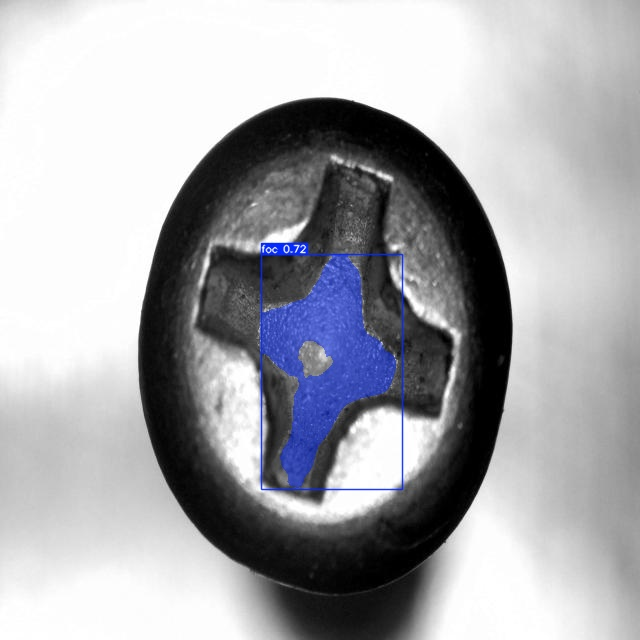

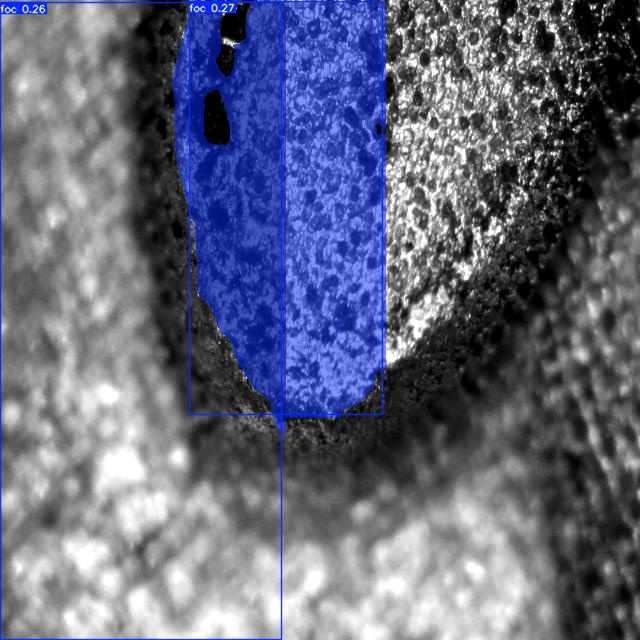

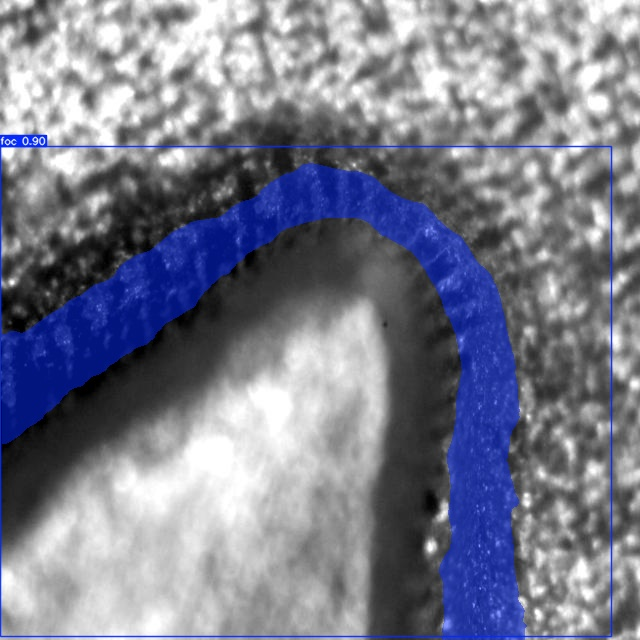

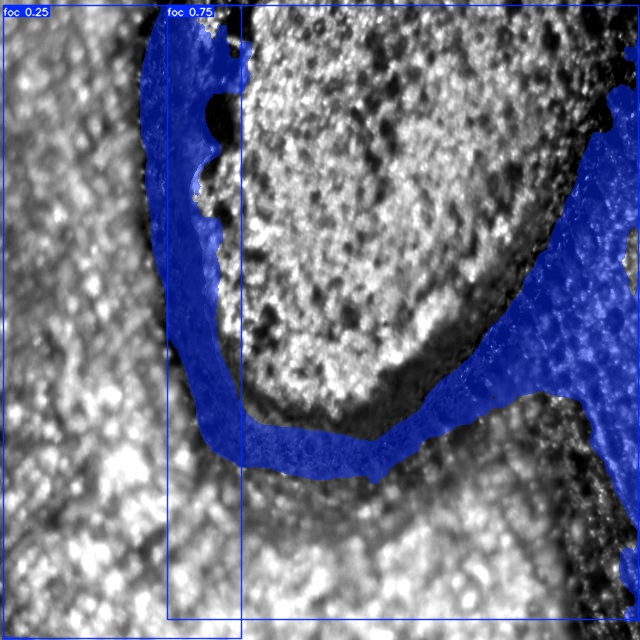

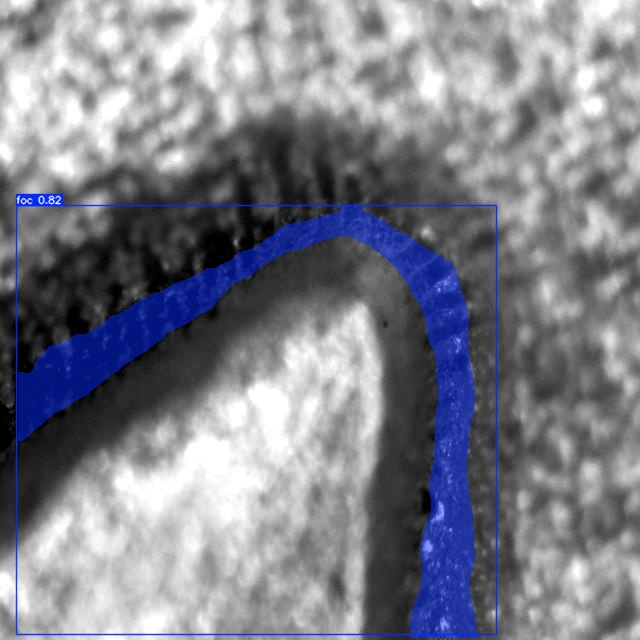

In [ ]:
from IPython.display import Image, display
import glob

for path in glob.glob("runs/predict/foc-test/*.jpg")[:5]:
    display(Image(filename=path))


In [ ]:
# ✅ STEP 2: Import libraries
import os
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image


In [ ]:
import yaml
os.environ["YOLO_AUGMENTATIONS"] = yaml.dump({
    "transforms": [
        {"type": "HorizontalFlip", "p": 0.5},
        {"type": "RandomBrightnessContrast", "p": 0.5},
        {"type": "Blur", "blur_limit": 3, "p": 0.2},
        {"type": "CLAHE", "p": 0.3},
        {"type": "HueSaturationValue", "p": 0.3},
    ]
})

In [16]:
model = YOLO("yolov8m-seg.pt")

results = model.train(
    data="/content/Microfocus-1/data.yaml",
    imgsz=640,
    epochs=100,
    # patience=10,  # Early stopping
    lr0=1e-3,
    lrf=1e-5,
    optimizer="Adam",
    batch=4,
    seed=42,
    device=0 if torch.cuda.is_available() else "cpu",
    augment=True,
    cos_lr=True,  # Cosine LR decay
    save=True,
    save_period=5,
    project="microfocus_yolo",
    name="yolov8m-seg-augmented_new",
    verbose=True
)

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/Microfocus-1/data.yaml, epochs=100, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=5, cache=False, device=0, workers=8, project=microfocus_yolo, name=yolov8m-seg-augmented_new, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

train: Scanning /content/Microfocus-1/train/labels.cache... 384 images, 21 backgrounds, 0 corrupt: 100%|██████████| 384/384 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Microfocus-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]


Plotting labels to microfocus_yolo/yolov8m-seg-augmented_new/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to microfocus_yolo/yolov8m-seg-augmented_new
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.17G      1.593      4.079      2.411      1.878         11        640: 100%|██████████| 96/96 [00:21<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all         37         50      0.466        0.3      0.282       0.15     0.0389        0.1    0.00637    0.00147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.17G      1.611      3.531      2.235      1.854          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.26it/s]

                   all         37         50     0.0684        0.4     0.0669     0.0245     0.0342       0.04    0.00753     0.0017



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.17G      1.667       3.28       2.16      1.922         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.47it/s]

                   all         37         50      0.256        0.4      0.314      0.117     0.0902       0.32     0.0526     0.0183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.19G      1.654      3.303      2.146      1.911         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.50it/s]

                   all         37         50      0.583        0.3      0.292     0.0692     0.0601        0.1     0.0249    0.00692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.19G      1.618      3.226      2.059      1.865         12        640: 100%|██████████| 96/96 [00:20<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.42it/s]

                   all         37         50      0.559       0.32      0.283      0.133      0.177        0.1     0.0512     0.0117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.27G      1.541      3.126      1.961      1.809          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]

                   all         37         50      0.708        0.5      0.475      0.291      0.724       0.36      0.359      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.34G      1.525      3.209       1.94      1.792         12        640: 100%|██████████| 96/96 [00:19<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.54it/s]

                   all         37         50      0.771       0.52      0.535      0.344      0.689       0.46      0.434      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.41G      1.523       3.21      1.912      1.783          7        640: 100%|██████████| 96/96 [00:20<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.69it/s]

                   all         37         50      0.797        0.5      0.558      0.295      0.605       0.38      0.348     0.0963



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.41G      1.426      3.055      1.784      1.704          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all         37         50      0.856      0.477      0.545      0.326      0.769        0.4      0.473      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.42G      1.527      3.048      1.894      1.769          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]

                   all         37         50      0.632       0.58      0.463      0.276       0.61       0.46      0.421      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.42G      1.382      2.991      1.727      1.648          6        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all         37         50      0.715       0.56      0.611      0.339       0.53       0.46      0.408      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.6G      1.446      2.944      1.738      1.713         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all         37         50      0.748       0.38        0.5      0.283      0.648       0.34      0.403      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.77G      1.405      2.989      1.707      1.674         15        640: 100%|██████████| 96/96 [00:20<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.59it/s]

                   all         37         50      0.657       0.52      0.546      0.333      0.459       0.46      0.364      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.03G      1.454      3.007      1.777      1.712         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         37         50      0.745      0.526      0.565      0.342      0.624       0.44      0.408      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100       4.1G      1.413      3.013      1.737      1.669         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

                   all         37         50      0.674       0.52      0.593       0.38      0.617       0.48      0.518      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.1G       1.38      2.897      1.632      1.631         18        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50      0.696       0.56      0.608      0.342      0.592       0.48      0.441      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       4.1G      1.378      2.851      1.651      1.656         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]

                   all         37         50      0.763       0.48      0.565      0.311      0.677       0.46      0.465       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       4.1G      1.413      2.998      1.694      1.677          6        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.51it/s]

                   all         37         50       0.52       0.58      0.532      0.268      0.634       0.52      0.456      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       4.1G      1.335      2.795      1.561      1.596          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all         37         50      0.887        0.5      0.581      0.313      0.814       0.46      0.486      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       4.1G      1.336      2.834      1.613      1.631         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         37         50       0.78       0.58      0.644      0.411      0.672       0.52      0.553      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       4.1G      1.366      2.754      1.574      1.645         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.78it/s]

                   all         37         50       0.93      0.534      0.624      0.381      0.791      0.455      0.523      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       4.1G      1.295      2.801      1.599      1.606         15        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]

                   all         37         50      0.765       0.52      0.613      0.393       0.72       0.48      0.529      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       4.1G      1.372      2.798      1.604      1.613         16        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all         37         50      0.706      0.576      0.564      0.324      0.514       0.42       0.34      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       4.1G      1.277      2.763      1.527      1.548          7        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.79it/s]

                   all         37         50      0.742        0.6      0.652      0.422      0.705       0.54      0.545      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       4.1G      1.286      2.716      1.513      1.577         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]

                   all         37         50      0.917       0.52      0.632      0.418      0.659      0.503      0.488        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       4.1G      1.282      2.781      1.516      1.578         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

                   all         37         50      0.915       0.52       0.62      0.386      0.784       0.48      0.523      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       4.1G      1.332      2.932      1.572      1.592         10        640: 100%|██████████| 96/96 [00:19<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all         37         50      0.862       0.58      0.648      0.379      0.742        0.5      0.495      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100       4.1G      1.253      2.729      1.451      1.544          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.61it/s]

                   all         37         50      0.751      0.543      0.609      0.328      0.691      0.538      0.509      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       4.1G      1.283      2.759      1.538      1.556          9        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50      0.702        0.6      0.631      0.399      0.625      0.534      0.506      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100       4.1G      1.235      2.648      1.461       1.53          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]

                   all         37         50      0.786      0.589      0.679       0.37      0.649       0.48      0.529      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100       4.1G      1.191      2.628      1.425      1.519         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.58it/s]

                   all         37         50      0.875        0.5      0.637      0.426      0.805       0.46      0.542      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100       4.1G      1.204      2.658      1.417      1.507         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.78it/s]

                   all         37         50      0.685      0.566      0.632      0.398      0.614      0.509      0.497      0.228



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       4.1G      1.233      2.622      1.447      1.513          9        640: 100%|██████████| 96/96 [00:19<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]

                   all         37         50      0.767      0.593      0.666       0.41      0.702       0.54      0.569      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       4.1G        1.2      2.584      1.406      1.523          7        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50      0.906       0.54      0.662      0.359      0.738       0.42      0.471      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100       4.1G      1.184      2.572      1.407      1.499         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.81it/s]

                   all         37         50      0.896      0.516      0.668      0.423      0.568        0.5      0.474       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100       4.1G      1.227      2.621       1.44      1.525         13        640: 100%|██████████| 96/96 [00:20<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.73it/s]

                   all         37         50      0.825       0.52      0.662      0.423      0.729       0.46      0.553      0.247



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100       4.1G      1.178      2.624      1.393      1.482         12        640: 100%|██████████| 96/96 [00:20<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all         37         50      0.862       0.58      0.715      0.429      0.813       0.54      0.597      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100       4.1G      1.214       2.66       1.46      1.499          6        640: 100%|██████████| 96/96 [00:19<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50       0.87      0.538      0.658        0.4      0.635      0.487       0.54      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100       4.1G      1.148      2.497      1.275      1.461         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.64it/s]

                   all         37         50      0.841       0.58      0.711       0.44       0.75       0.54      0.555      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       4.1G       1.18      2.616      1.337      1.473          5        640: 100%|██████████| 96/96 [00:20<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all         37         50      0.897        0.6      0.716      0.444      0.802       0.54      0.618       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.1G      1.164      2.476      1.316      1.438         13        640: 100%|██████████| 96/96 [00:20<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         37         50      0.824      0.657      0.716      0.446       0.74        0.6      0.608      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.1G      1.201      2.603       1.37      1.493          8        640: 100%|██████████| 96/96 [00:19<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all         37         50       0.87      0.537      0.647      0.424      0.709      0.438      0.462      0.229



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       4.1G      1.161      2.497      1.339      1.478          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all         37         50      0.824       0.56      0.647       0.39      0.771       0.48      0.553      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       4.1G      1.164      2.625      1.311       1.47         27        640: 100%|██████████| 96/96 [00:19<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50      0.611       0.66      0.645      0.374      0.723       0.46      0.524      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       4.1G      1.144      2.556      1.326      1.461         13        640: 100%|██████████| 96/96 [00:19<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all         37         50      0.899       0.56       0.66      0.407      0.802        0.5      0.538      0.238



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       4.1G       1.15      2.402      1.278      1.472          7        640: 100%|██████████| 96/96 [00:20<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all         37         50      0.802       0.58      0.661      0.394      0.689       0.52      0.555      0.263



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100       4.1G      1.143      2.498      1.304      1.448         12        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]

                   all         37         50      0.784       0.68      0.713      0.465      0.659      0.541      0.568      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100       4.1G      1.154      2.451      1.341      1.463         16        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50      0.809        0.7      0.717      0.462      0.716       0.62        0.6      0.277



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       4.1G      1.107      2.462      1.248      1.421         13        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.69it/s]

                   all         37         50      0.872       0.58      0.702      0.463      0.776        0.5      0.581       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       4.1G      1.117      2.365      1.223      1.423         12        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]

                   all         37         50      0.879        0.6      0.727       0.46      0.754       0.52      0.569      0.285



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100       4.1G      1.157      2.496      1.249       1.45          4        640: 100%|██████████| 96/96 [00:20<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]

                   all         37         50      0.907      0.584      0.715      0.447      0.814      0.524      0.586      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       4.1G      1.076      2.496      1.241      1.395          9        640: 100%|██████████| 96/96 [00:19<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.70it/s]

                   all         37         50      0.852        0.6      0.701      0.464      0.714        0.5      0.552      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       4.1G       1.13      2.425      1.248      1.418          9        640: 100%|██████████| 96/96 [00:20<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all         37         50      0.731        0.6      0.641      0.409      0.717        0.5      0.531      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100       4.1G      1.139      2.352      1.333      1.458          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]

                   all         37         50      0.848        0.6      0.698      0.411      0.724       0.52      0.538      0.235



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       4.1G       1.08      2.411      1.243      1.411         15        640: 100%|██████████| 96/96 [00:19<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.40it/s]

                   all         37         50      0.781      0.571      0.687      0.417      0.698       0.52      0.551      0.259



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100       4.1G      1.067      2.364      1.162      1.398          9        640: 100%|██████████| 96/96 [00:19<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.67it/s]

                   all         37         50      0.775       0.62      0.708      0.423      0.648       0.58      0.571      0.266



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100       4.1G      1.081      2.363      1.228      1.437          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all         37         50      0.695       0.74      0.754      0.439      0.599       0.66      0.615      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       4.1G      1.059      2.311      1.188      1.431         12        640: 100%|██████████| 96/96 [00:19<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.68it/s]

                   all         37         50      0.869       0.56       0.74      0.494      0.793        0.5      0.606      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100       4.1G      1.086      2.351      1.187      1.406         12        640: 100%|██████████| 96/96 [00:20<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50      0.869       0.58      0.717      0.471      0.779       0.52      0.595      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       4.1G      1.025      2.265      1.119      1.391          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.74it/s]

                   all         37         50      0.789       0.62      0.691      0.429      0.686       0.54      0.565      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100       4.1G      1.059      2.386      1.212      1.399         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all         37         50      0.842       0.58      0.724      0.417      0.841       0.46      0.563      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100       4.1G      1.057      2.344      1.177      1.384         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]

                   all         37         50      0.811       0.62      0.682        0.4      0.733       0.56      0.562      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       4.1G      1.042      2.279      1.167      1.375         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

                   all         37         50      0.847       0.58      0.706      0.428      0.817       0.48      0.564      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100       4.1G      1.055      2.315      1.156      1.385         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

                   all         37         50      0.813       0.61      0.713      0.439      0.779       0.52      0.579      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       4.1G      1.035      2.265      1.162       1.37          9        640: 100%|██████████| 96/96 [00:20<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.87it/s]

                   all         37         50      0.839       0.58      0.689      0.439      0.771       0.54      0.581      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100       4.1G       1.09      2.251      1.195       1.43         10        640: 100%|██████████| 96/96 [00:19<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.25it/s]

                   all         37         50       0.87       0.56      0.682      0.441      0.825       0.46      0.564      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100       4.1G     0.9945      2.273       1.12      1.349          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50      0.964      0.535      0.696      0.468      0.886       0.48      0.566      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       4.1G       1.05      2.236      1.125      1.379         12        640: 100%|██████████| 96/96 [00:19<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.85it/s]

                   all         37         50      0.966       0.56      0.707      0.482       0.87        0.5      0.574      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       4.1G      1.015      2.209       1.11      1.377          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.90it/s]

                   all         37         50      0.933      0.555      0.718      0.473      0.833      0.498       0.57      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100       4.1G          1      2.202      1.057      1.356          8        640: 100%|██████████| 96/96 [00:20<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.48it/s]

                   all         37         50      0.922       0.54      0.707      0.468      0.819       0.48      0.566      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       4.1G      1.041      2.292      1.121      1.355          7        640: 100%|██████████| 96/96 [00:20<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.05it/s]

                   all         37         50      0.902       0.56      0.713      0.473      0.618       0.66        0.6      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100       4.1G      1.022      2.174      1.057      1.374          7        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

                   all         37         50       0.84       0.62      0.727      0.492      0.758       0.56        0.6      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100       4.1G      0.975      2.258      1.096      1.341          9        640: 100%|██████████| 96/96 [00:19<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50      0.829       0.58      0.699      0.464       0.79       0.52      0.585      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100       4.1G     0.9636       2.23      1.066      1.333         14        640: 100%|██████████| 96/96 [00:20<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.42it/s]

                   all         37         50      0.693       0.68      0.699      0.457      0.697       0.52      0.557      0.284



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100       4.1G     0.9588      2.187      1.077      1.324         13        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50      0.678       0.66      0.692      0.456       0.62        0.6      0.571      0.299



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       4.1G     0.9798      2.237      1.072      1.345         14        640: 100%|██████████| 96/96 [00:20<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.62it/s]

                   all         37         50      0.775        0.6      0.669      0.446      0.776        0.5      0.569      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       4.1G     0.9177      2.104      1.024       1.31          6        640: 100%|██████████| 96/96 [00:19<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50       0.79       0.62      0.705      0.452        0.8        0.5      0.585      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100       4.1G     0.9575      2.185      1.078      1.348         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

                   all         37         50      0.921       0.56      0.703      0.444      0.699       0.58       0.59      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100       4.1G     0.9177      2.088      1.009      1.307         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

                   all         37         50      0.818       0.58       0.71       0.44      0.896       0.46      0.567      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100       4.1G     0.9573      2.129       1.01      1.356          9        640: 100%|██████████| 96/96 [00:20<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.82it/s]

                   all         37         50      0.787       0.59      0.703      0.444       0.92      0.458      0.566      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       4.1G      0.968      2.156      1.053      1.338         13        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.75it/s]

                   all         37         50      0.852       0.58       0.69      0.452      0.738       0.52      0.564      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100       4.1G     0.9516       2.09      1.055      1.323         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         37         50       0.81      0.598       0.72      0.472      0.635        0.6      0.594       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       4.1G     0.9273        2.1      1.059      1.291         11        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.61it/s]

                   all         37         50       0.91        0.6      0.733      0.473      0.785       0.52      0.576      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100       4.1G     0.8883      2.046     0.9944      1.258         12        640: 100%|██████████| 96/96 [00:20<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.90it/s]

                   all         37         50      0.909       0.62      0.721      0.479      0.854       0.52      0.584      0.316



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       4.1G     0.9345       2.08     0.9938      1.305          8        640: 100%|██████████| 96/96 [00:19<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.98it/s]

                   all         37         50      0.877        0.6      0.722      0.478      0.843        0.5      0.594      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100       4.1G     0.8668      2.007      0.955      1.295          7        640: 100%|██████████| 96/96 [00:19<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.70it/s]

                   all         37         50       0.88      0.589      0.721      0.472      0.834      0.503      0.601      0.317



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100       4.1G     0.9256      2.103     0.9783      1.327         11        640: 100%|██████████| 96/96 [00:19<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.84it/s]

                   all         37         50      0.923       0.58      0.717      0.473      0.855       0.54      0.606      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       4.1G      0.942       2.13      1.042      1.312         14        640: 100%|██████████| 96/96 [00:20<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.77it/s]

                   all         37         50      0.921       0.58      0.718      0.475      0.853       0.54       0.61       0.32



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100       4.1G     0.9344      2.058      1.031      1.311         10        640: 100%|██████████| 96/96 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.76it/s]

                   all         37         50      0.838        0.6      0.736      0.476      0.868       0.54      0.606      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       4.1G      0.885      2.051      0.943       1.27         12        640: 100%|██████████| 96/96 [00:19<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50      0.721      0.722      0.742      0.474      0.895       0.54        0.6      0.307


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100       4.1G     0.8373      1.835          1        1.4          5        640: 100%|██████████| 96/96 [00:20<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.29it/s]

                   all         37         50      0.888       0.56      0.713      0.452      0.854       0.54      0.586      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100       4.1G     0.7324      1.802     0.9274      1.314          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

                   all         37         50      0.866       0.58      0.721      0.463      0.886       0.54      0.602      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100       4.1G     0.7775      1.774     0.9112      1.337          4        640: 100%|██████████| 96/96 [00:20<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         37         50      0.923       0.58      0.722      0.467      0.885       0.54      0.603      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100       4.1G      0.733      1.771     0.9188      1.323          8        640: 100%|██████████| 96/96 [00:19<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.63it/s]

                   all         37         50      0.924       0.58      0.722      0.466       0.88       0.54      0.603      0.291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100       4.1G     0.7462      1.753     0.8861      1.319          7        640: 100%|██████████| 96/96 [00:19<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.66it/s]

                   all         37         50      0.906       0.58       0.72      0.468      0.867      0.521      0.603      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.1G     0.7377      1.784      0.865      1.317          5        640: 100%|██████████| 96/96 [00:19<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]

                   all         37         50      0.908       0.58      0.719      0.466      0.878       0.52        0.6      0.293



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100       4.1G     0.7277      1.725     0.8341      1.317          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all         37         50      0.907      0.583      0.721       0.47      0.887       0.52      0.605      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100       4.1G     0.7285      1.706     0.8396      1.321          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.71it/s]

                   all         37         50      0.907      0.582      0.721       0.47      0.896       0.52      0.602      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.1G     0.7136      1.739     0.8312      1.297          4        640: 100%|██████████| 96/96 [00:19<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.49it/s]

                   all         37         50      0.909      0.599      0.721      0.468      0.895       0.52      0.602      0.296



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100       4.1G     0.7912      1.819     0.9091      1.364          4        640: 100%|██████████| 96/96 [00:20<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         37         50      0.905       0.58       0.72      0.467      0.892       0.52      0.602      0.297



100 epochs completed in 0.693 hours.
Optimizer stripped from microfocus_yolo/yolov8m-seg-augmented_new/weights/last.pt, 54.8MB
Optimizer stripped from microfocus_yolo/yolov8m-seg-augmented_new/weights/best.pt, 54.8MB

Validating microfocus_yolo/yolov8m-seg-augmented_new/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/5 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 1/5 [00:00<00:00,  4.98it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 2/5 [00:00<00:00,  3.77it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 3/5 [00:01<00:00,  2.46it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 4/5 [00:01<00:00,  2.03it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


                   all         37         50       0.84       0.62      0.728      0.492      0.757       0.56        0.6      0.314
Speed: 0.8ms preprocess, 17.7ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to microfocus_yolo/yolov8m-seg-augmented_new


In [17]:
import pandas as pd
from ultralytics import YOLO

# Reload the best model (optional, in case notebook restarted)
#model = YOLO("microfocus_yolo/yolov8m-seg-augmented/weights/best.pt")

# Run evaluation
val_results = model.val(data="/content/Microfocus-1/data.yaml")

# Extract relevant metrics
metrics_dict = val_results.results_dict

# Separate box and mask metrics
box_metrics = {
    "Box Precision": metrics_dict["metrics/precision(B)"],
    "Box Recall": metrics_dict["metrics/recall(B)"],
    "Box mAP@0.5": metrics_dict["metrics/mAP50(B)"],
    "Box mAP@0.5:0.95": metrics_dict["metrics/mAP50-95(B)"],
}

mask_metrics = {
    "Mask Precision": metrics_dict["metrics/precision(M)"],
    "Mask Recall": metrics_dict["metrics/recall(M)"],
    "Mask mAP@0.5": metrics_dict["metrics/mAP50(M)"],
    "Mask mAP@0.5:0.95": metrics_dict["metrics/mAP50-95(M)"],
}

# Create DataFrames
df_box = pd.DataFrame.from_dict(box_metrics, orient="index", columns=["Value"])
df_mask = pd.DataFrame.from_dict(mask_metrics, orient="index", columns=["Value"])

# Display the tables
print("📦 Box Metrics")
display(df_box)

print("🎭 Mask Metrics")
display(df_mask)


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


val: Scanning /content/Microfocus-1/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/10 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  10%|█         | 1/10 [00:00<00:02,  3.47it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  20%|██        | 2/10 [00:00<00:02,  3.10it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  30%|███       | 3/10 [00:01<00:02,  2.64it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  40%|████      | 4/10 [00:01<00:02,  2.79it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 5/10 [00:01<00:01,  3.34it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  60%|██████    | 6/10 [00:01<00:01,  3.92it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  70%|███████   | 7/10 [00:01<00:00,  4.59it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  80%|████████  | 8/10 [00:02<00:00,  5.14it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  90%|█████████ | 9/10 [00:02<00:00,  5.59it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]


                   all         37         50      0.841       0.62      0.728      0.491      0.766       0.54      0.584      0.313
Speed: 4.5ms preprocess, 33.2ms inference, 0.5ms loss, 1.9ms postprocess per image
Results saved to microfocus_yolo/yolov8m-seg-augmented_new2
📦 Box Metrics


,Value
Box Precision,0.840796
Box Recall,0.620000
Box mAP@0.5,0.727532
Box mAP@0.5:0.95,0.491445


🎭 Mask Metrics


,Value
Mask Precision,0.765626
Mask Recall,0.540000
Mask mAP@0.5,0.583687
Mask mAP@0.5:0.95,0.312619
